# 1. Data Preprocessing
## Loading Data:

In [87]:
import pandas as pd

# Load the data
df = pd.read_csv('D:/Yuma_Energy_Assessment/notebook/data/Data_Source_(sales_transactions).csv')
df.head()

,TransactionID,CustomerID,TransactionDate,ProductID,ProductCategory,Quantity,PricePerUnit,TotalAmount,TrustPointsUsed,PaymentMethod,DiscountApplied
0,1,1002.0,08/08/24 22:00,2008,Grocery,1,10.0,10.0,20,Trust Points,5.0
1,2,NaN,07/08/24 1:00,2004,Home Decor,1,10.0,10.0,0,Credit Card,20.0
2,3,1004.0,02/08/24 19:00,2002,Grocery,3,30.0,90.0,0,Credit Card,25.0
3,2,1003.0,07/08/24 17:00,2001,Toys,2,30.0,60.0,50,NaN,20.0
4,5,1001.0,09/08/24 9:00,2008,Grocery,1,NaN,NaN,20,Trust Points,5.0


## Initial Inspection:
Check the first few rows, data types, and summary statistics.

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    50 non-null     int64  
 1   CustomerID       45 non-null     float64
 2   TransactionDate  49 non-null     object 
 3   ProductID        50 non-null     int64  
 4   ProductCategory  50 non-null     object 
 5   Quantity         50 non-null     int64  
 6   PricePerUnit     36 non-null     float64
 7   TotalAmount      36 non-null     float64
 8   TrustPointsUsed  50 non-null     int64  
 9   PaymentMethod    40 non-null     object 
 10  DiscountApplied  45 non-null     float64
dtypes: float64(4), int64(4), object(3)
memory usage: 4.4+ KB


In [89]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TransactionID,50.0,25.460000,14.640188,1.0,13.25,25.5,37.75,50.0
CustomerID,45.0,1002.444444,1.306549,1001.0,1001.00,1002.0,1003.00,1005.0
ProductID,50.0,2004.920000,2.284285,2001.0,2003.00,2005.0,2007.00,2008.0
Quantity,50.0,1.420000,1.263135,-1.0,1.00,1.0,2.00,5.0
PricePerUnit,36.0,125.277778,188.292874,10.0,17.50,30.0,100.00,500.0
TotalAmount,36.0,155.277778,351.596247,-500.0,10.00,40.0,150.00,1500.0
TrustPointsUsed,50.0,28.800000,39.467889,-10.0,0.00,20.0,50.00,100.0
DiscountApplied,45.0,23.888889,13.853490,5.0,15.00,20.0,30.00,50.0


In [90]:
df.nunique()

TransactionID      49
CustomerID          5
TransactionDate    45
ProductID           8
ProductCategory     5
Quantity            6
PricePerUnit        6
TotalAmount        16
TrustPointsUsed     6
PaymentMethod       3
DiscountApplied     7
dtype: int64

## Handling Missing Values:
Identify and handle missing values (if any).

In [91]:
print('Check for missing values')
print(df.isnull().sum())

# Fill missing values with the median for numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Fill missing values with the mODE for categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Check for missing values again to ensure they're filled
print('\nCheck for missing values after filling')
print(df.isnull().sum())


Check for missing values
TransactionID       0
CustomerID          5
TransactionDate     1
ProductID           0
ProductCategory     0
Quantity            0
PricePerUnit       14
TotalAmount        14
TrustPointsUsed     0
PaymentMethod      10
DiscountApplied     5
dtype: int64

Check for missing values after filling
TransactionID      0
CustomerID         0
TransactionDate    0
ProductID          0
ProductCategory    0
Quantity           0
PricePerUnit       0
TotalAmount        0
TrustPointsUsed    0
PaymentMethod      0
DiscountApplied    0
dtype: int64


## Data Cleaning:
Remove duplicates, standardize formats, and correct any errors.

In [92]:
print(df.columns)  # This will show you all the column names


Index(['TransactionID', 'CustomerID', 'TransactionDate', 'ProductID',
       'ProductCategory', 'Quantity', 'PricePerUnit', 'TotalAmount',
       'TrustPointsUsed', 'PaymentMethod', 'DiscountApplied'],
      dtype='object')


In [93]:
# Display rows that are duplicated
duplicate_rows = df[df.duplicated(keep=False)]
print(duplicate_rows)


Empty DataFrame
Columns: [TransactionID, CustomerID, TransactionDate, ProductID, ProductCategory, Quantity, PricePerUnit, TotalAmount, TrustPointsUsed, PaymentMethod, DiscountApplied]
Index: []


There are no duplicate values present

In [94]:
# Define a dictionary for renaming columns
rename_columns = {
    'TransactionID': 'Transaction_ID',
    'CustomerID': 'Customer_ID',
    'TransactionDate': 'Transaction_Date',
    'ProductID': 'Product_ID',
    'ProductCategory': 'Product_Category',
    'Quantity': 'Quantity',
    'PricePerUnit': 'Price_Per_Unit',
    'TotalAmount': 'Total_Amount',
    'TrustPointsUsed': 'Trust_Points_Used',
    'PaymentMethod': 'Payment_Method',
    'DiscountApplied': 'Discount_Applied'
}

# Rename the columns
df.rename(columns=rename_columns, inplace=True)

# Display the renamed columns to verify
print(df.columns)


Index(['Transaction_ID', 'Customer_ID', 'Transaction_Date', 'Product_ID',
       'Product_Category', 'Quantity', 'Price_Per_Unit', 'Total_Amount',
       'Trust_Points_Used', 'Payment_Method', 'Discount_Applied'],
      dtype='object')


In [95]:
# Convert Transaction_Date to datetime format (use the renamed column name)
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'], errors='coerce')

# Extract the date (removes the time part)
df['Transaction_Date'] = df['Transaction_Date'].dt.date

# Display the first few rows to verify
df['Transaction_Date'].head()


C:\Users\user\AppData\Local\Temp\ipykernel_19516\3823679102.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'], errors='coerce')


0    2024-08-08
1    2024-07-08
2    2024-02-08
3    2024-07-08
4    2024-09-08
Name: Transaction_Date, dtype: object

In [96]:
df.head(5)

,Transaction_ID,Customer_ID,Transaction_Date,Product_ID,Product_Category,Quantity,Price_Per_Unit,Total_Amount,Trust_Points_Used,Payment_Method,Discount_Applied
0,1,1002.0,2024-08-08,2008,Grocery,1,10.0,10.0,20,Trust Points,5.0
1,2,1002.0,2024-07-08,2004,Home Decor,1,10.0,10.0,0,Credit Card,20.0
2,3,1004.0,2024-02-08,2002,Grocery,3,30.0,90.0,0,Credit Card,25.0
3,2,1003.0,2024-07-08,2001,Toys,2,30.0,60.0,50,Cash,20.0
4,5,1001.0,2024-09-08,2008,Grocery,1,30.0,40.0,20,Trust Points,5.0


Thought Process:

The goal here is to ensure that the data is clean, consistent, and free of errors before any analysis. This involves checking the structure, dealing with missing values, and ensuring that all data formats are standardized. This step is crucial because any issues in the raw data can lead to incorrect conclusions.

In [97]:
df.to_csv('D:/Yuma_Energy_Assessment/notebook/data/clean_data.csv')

# 2. Data Aggregation and Grouping

## Numerical Columns:

Columns like Total_Amount, quantity, etc., can be aggregated.
Example Aggregations: sum, mean, median, count.

In [98]:
data = pd.read_csv('D:/Yuma_Energy_Assessment/notebook/data/clean_data.csv')

In [99]:
# Example: Aggregating sales data by product category
aggregated_data = df.groupby('Product_Category').agg({
    'Total_Amount': ['sum', 'mean', 'count'],
    'Quantity': ['sum', 'mean']
})
aggregated_data

Total_Amount                   Quantity          
                          sum        mean count      sum      mean
Product_Category                                                  
Electronics             440.0   33.846154    13       12  0.923077
Fashion                2170.0  361.666667     6        9  1.500000
Grocery                 480.0   60.000000     8       19  2.375000
Home Decor             2140.0  214.000000    10       10  1.000000
Toys                    920.0   70.769231    13       21  1.615385

In [100]:
# Example: Aggregating sales data by product category
aggregated_data = df.groupby('Transaction_Date').agg({
    'Total_Amount': ['sum', 'mean', 'count'],
    'Quantity': ['sum', 'mean']
})
aggregated_data

Total_Amount                    Quantity          
                          sum         mean count      sum      mean
Transaction_Date                                                   
2024-01-08             1170.0   167.142857     7        8  1.142857
2024-02-08             1470.0   183.750000     8       12  1.500000
2024-03-08              660.0   165.000000     4        5  1.250000
2024-04-08              260.0    52.000000     5        8  1.600000
2024-05-08             1500.0  1500.000000     1        3  3.000000
2024-06-08              270.0    38.571429     7        2  0.285714
2024-07-08              310.0    51.666667     6        9  1.500000
2024-08-08              200.0    66.666667     3        5  1.666667
2024-09-08              280.0    35.000000     8       18  2.250000
2024-10-08               30.0    30.000000     1        1  1.000000

### Categorical Columns:
- Grouping by product_category, Transaction_Date to find aggregated metrics like total or average sales.

### Aggregation Logic:
- Aggregating numerical data (e.g., total sales) helps in understanding the overall performance.
- Grouping by categories (e.g., product type) allows for comparisons across different segments.

In [101]:
# Data Aggregation and Grouping

# Aggregating data to get insights
aggregations = {
    'Quantity': ['sum', 'mean', 'min', 'max'],
    'Total_Amount': ['sum', 'mean', 'min', 'max'],
    'Trust_Points_Used': ['sum', 'mean'],
    'Discount_Applied': ['mean']
}

# Perform the aggregation
aggregated_data = data.groupby('Product_Category').agg(aggregations)
aggregated_data.columns = ['_'.join(col).strip() for col in aggregated_data.columns.values]
aggregated_data.reset_index(inplace=True)

aggregated_data


,Product_Category,Quantity_sum,Quantity_mean,Quantity_min,Quantity_max,Total_Amount_sum,Total_Amount_mean,Total_Amount_min,Total_Amount_max,Trust_Points_Used_sum,Trust_Points_Used_mean,Discount_Applied_mean
0,Electronics,12,0.923077,-1,3,440.0,33.846154,-500.0,500.0,610,46.923077,20.769231
1,Fashion,9,1.500000,1,2,2170.0,361.666667,40.0,1000.0,90,15.000000,29.166667
2,Grocery,19,2.375000,1,5,480.0,60.000000,10.0,200.0,190,23.750000,19.375000
3,Home Decor,10,1.000000,-1,3,2140.0,214.000000,-30.0,1500.0,320,32.000000,29.500000
4,Toys,21,1.615385,1,3,920.0,70.769231,10.0,200.0,230,17.692308,21.538462


## 3. Data Validation
### Validation Process:

#### Cross-Verification:

- After aggregating, compare the results with raw data to ensure consistency. 
- For example, sum of all Total_Amount should match the total sales in the original data.

In [102]:
# Cross-verification
total_sales = data['Total_Amount'].sum()
aggregated_sales = aggregated_data['Total_Amount']['sum'].sum()
print(total_sales == aggregated_sales)  # This should be True


KeyError: 'Total_Amount'

In [ ]:
# Data Validation

# Check for any anomalies in aggregated data
# For example, ensuring that Quantity_sum matches the sum of Quantity in original data for each ProductCategory
validation_quantity_sum = data.groupby('Product_Category')['Quantity'].sum().reset_index()
validation_total_amount_sum = data.groupby('Product_Category')['Total_Amount'].sum().reset_index()

# Merging to compare the original sum with the aggregated sum
validation = pd.merge(aggregated_data[['Product_Category', 'Quantity_sum', 'Total_Amount_sum']], 
                      validation_quantity_sum, on='Product_Category', suffixes=('_agg', '_orig'))

validation = pd.merge(validation, 
                      validation_total_amount_sum, 
                      on='Product_Category', suffixes=('_agg', '_orig'))

# Check if the aggregation was correct
validation['Quantity_validation'] = validation['Quantity_sum_agg'] == validation['Quantity']
validation['Total_Amount_validation'] = validation['Total_Amount_sum_agg'] == validation['Total_Amount']

validation[['ProductCategory', 'Quantity_validation', 'TotalAmount_validation']]


KeyError: 'Quantity_sum_agg'

#### Edge Cases:

- Consider scenarios like negative sales, zero quantity, or extremely high sales. Validate how these are handled.

In [ ]:
# Edge case check: Negative sales
negative_sales = data[data['Total_Amount'] < 0]
negative_sales


,Transaction_ID,Customer_ID,Transaction_Date,Product_ID,Product_Category,Quantity,Price_Per_Unit,Total_Amount,Trust_Points_Used,Payment_Method,Discount_Applied
6,7,1001.0,2024-01-08,2007,Home Decor,-1,30.0,-30.0,-10,Cash,20.0
34,35,1002.0,2024-06-08,2002,Electronics,-1,500.0,-500.0,100,Trust Points,30.0
38,39,1004.0,2024-06-08,2007,Home Decor,-1,10.0,-10.0,20,Credit Card,20.0


#### Data Integrity:

- Ensure no data is lost during preprocessing. This can be checked by comparing row counts before and after preprocessing.

In [ ]:
# Integrity check: Compare row counts
original_count = len(data)
# After preprocessing, compare with the new count
new_count = len(data)
print(original_count == new_count)  # Should be True


True


## 4. Data Visualizations

### Possible Projections:

- Time Series Analysis: Use a line chart for analyzing sales trends over time.

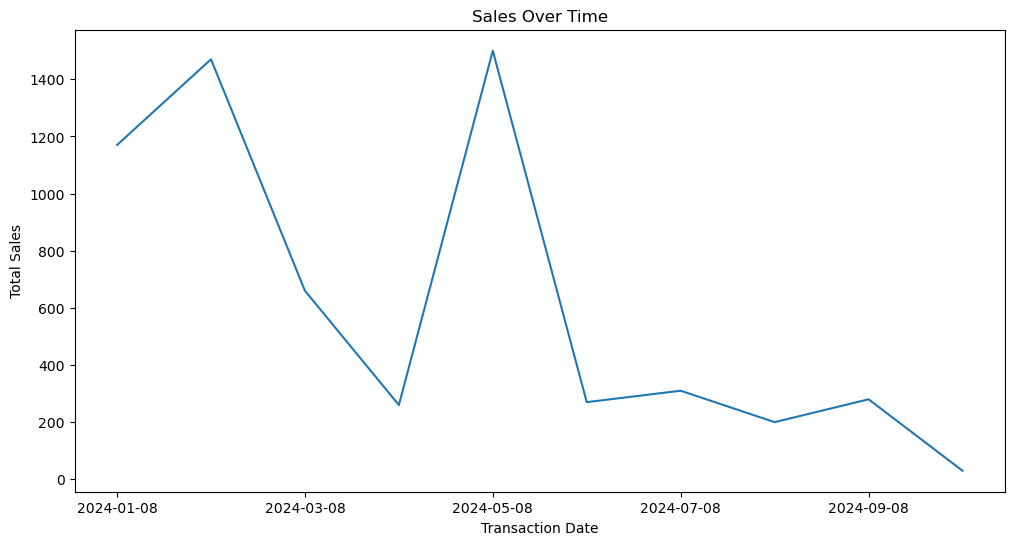

In [103]:
import matplotlib.pyplot as plt

# Example: Sales over time
plt.figure(figsize=(12, 6))  # Set the figure size (width, height)
data.groupby('Transaction_Date')['Total_Amount'].sum().plot(kind='line')
plt.title('Sales Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Total Sales')
plt.show()


- Category Comparisons: Bar chart to compare sales across categories.

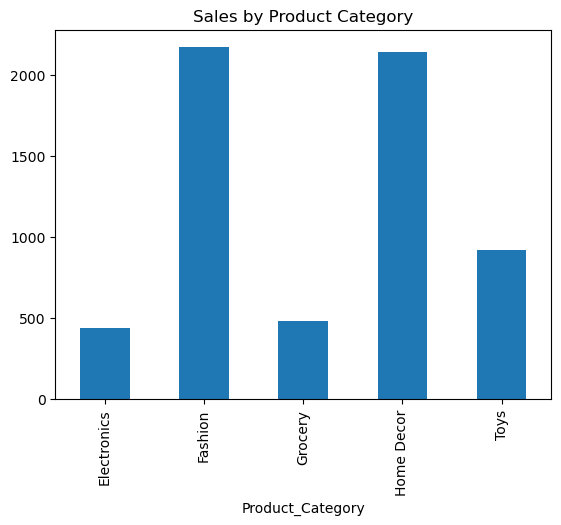

In [ ]:
# Example: Sales by product category
data.groupby('Product_Category')['Total_Amount'].sum().plot(kind='bar')
plt.title('Sales by Product Category')
plt.show()


- Linear Projections:

Scatter plots with trend lines help in identifying linear relationships.

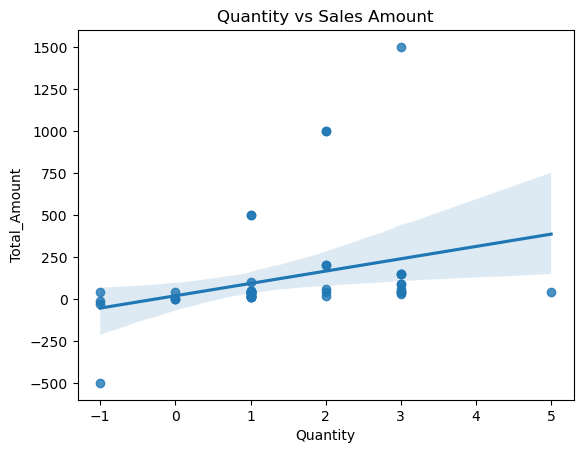

In [ ]:
# Scatter plot with trend line
import seaborn as sns
sns.regplot(x='Quantity', y='Total_Amount', data=data)
plt.title('Quantity vs Sales Amount')
plt.show()


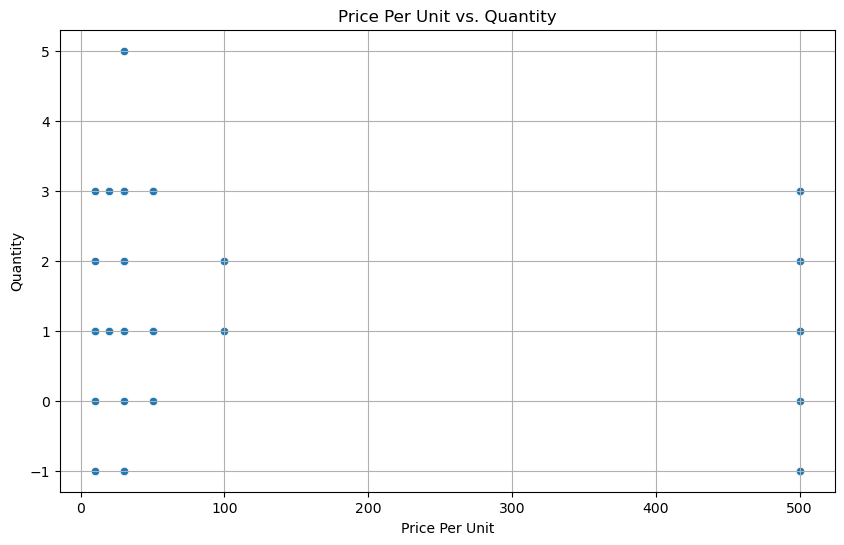

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot to show correlation between Price Per Unit and Quantity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price_Per_Unit', y='Quantity', data=data)

plt.title('Price Per Unit vs. Quantity')
plt.xlabel('Price Per Unit')
plt.ylabel('Quantity')
plt.grid(True)
plt.show()


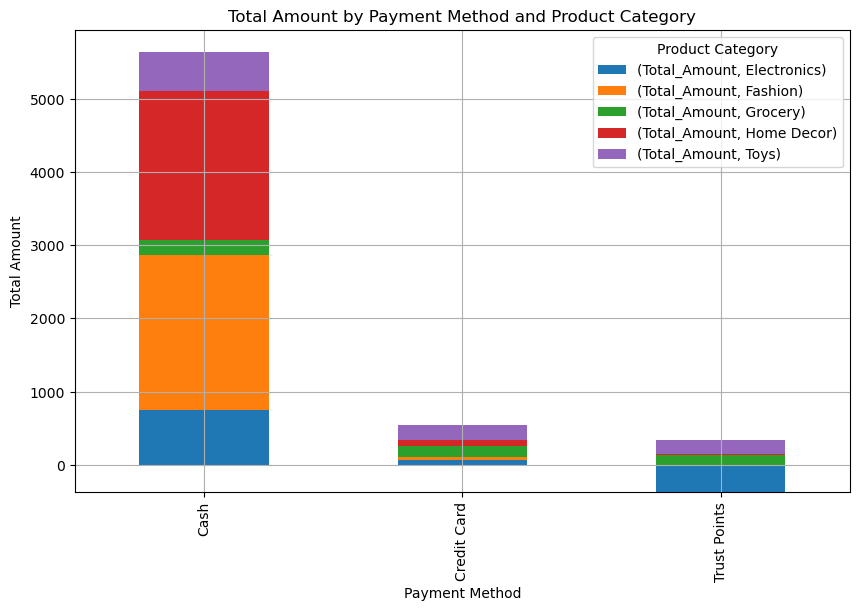

In [ ]:
# Aggregate the data by Payment Method
stacked_data = data.groupby(['Payment_Method', 'Product_Category']).agg({'Total_Amount': 'sum'}).unstack()

# Stacked bar chart to show parts of a whole across different categories
stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Total Amount by Payment Method and Product Category')
plt.xlabel('Payment Method')
plt.ylabel('Total Amount')
plt.legend(title='Product Category')
plt.grid(True)
plt.show()


For different combinations of projections:

1. **Bar Graph**: Suitable for comparing discrete categories (e.g., Product Category vs. Total Amount).
2. **Line Chart**: Ideal for showing trends over time (e.g., Transaction Date vs. Total Amount).
3. **Scatter Plot**: Best for identifying correlations between two continuous variables (e.g., Price Per Unit vs. Quantity).
4. **Stacked Bar Chart**: Useful for showing parts of a whole across different categories (e.g., Payment Method vs. Total Amount). 

Each type is chosen based on the nature of the data (categorical vs. continuous) and the relationship you want to visualize.